# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [184]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Latitude_Munici

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
sinasc_raw.loc[sinasc_raw['munResLat']>-10.5,'Latitude_Municipio-10.5']='acima'
sinasc_raw.loc[sinasc_raw['munResLat']<-10.5,'Latitude_Municipio-10.5']='abaixo'
sinasc_modelo=sinasc_raw[['munResLat','Latitude_Municipio-10.5','QTDPARTNOR','QTDPARTCES']]     
sinasc_modelo.groupby('Latitude_Municipio-10.5').agg(['sum','mean','min','max','median','std','var'])


munResLat                                 \
                                  sum       mean       min       max   
Latitude_Municipio-10.5                                                
abaixo                  -150874.73529 -11.612001 -13.49976 -10.56842   
acima                   -129611.14031  -9.235509 -10.43595  -8.76889   

                                                      QTDPARTNOR            \
                           median       std       var        sum      mean   
Latitude_Municipio-10.5                                                      
abaixo                  -11.52855  0.738864  0.545920     5800.0  0.452242   
acima                    -8.76889  0.639948  0.409534     8771.0  0.711759   

                              ...                            QTDPARTCES  \
                         min  ... median       std       var        sum   
Latitude_Municipio-10.5       ...                                         
abaixo                   0.0  ...    0.0  1.123426  1.262087     7095.0   
acima                    0.0  ...    0.0  1.279042  1.635949     6041.0   

                                                                         
                             mean  min   max median       std       var  
Latitude_Municipio-10.5                                                  
abaixo                   0.552570  0.0  12.0    0.0  0.753036  0.567062  
acima                    0.487335  0.0  12.0    0.0  0.737899  0.544495  

[2 rows x 21 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
sinasc_raw.loc[sinasc_raw['munResArea']>3000, "AreaMunicipio_3000"]='acima'
sinasc_raw.loc[sinasc_raw['munResArea']<3000, "AreaMunicipio_3000"]='abaixo'
sinasc_modelo2=sinasc_raw[['AreaMunicipio_3000','munResArea','CONSULTAS','TPMETESTIM']]
sinasc_modelo2.groupby('AreaMunicipio_3000').agg(['sum','mean','min','max','median','std','var'])

munResArea                                     \
                             sum          mean       min        max   
AreaMunicipio_3000                                                    
abaixo              9.665178e+06   1851.921453   459.978   2944.128   
acima               3.877074e+08  17778.218601  3029.189  34096.394   

                                                          CONSULTAS            \
                       median           std           var       sum      mean   
AreaMunicipio_3000                                                              
abaixo               1758.465    709.884005  5.039353e+05     19520  3.740180   
acima               10959.767  13554.195564  1.837162e+08     77142  3.537326   

                        ...                            TPMETESTIM            \
                   min  ... median       std       var        sum      mean   
AreaMunicipio_3000      ...                                                   
abaixo               1  ...    4.0  0.607492  0.369046    36951.0  7.198714   
acima                1  ...    4.0  0.820967  0.673986   132025.0  6.391605   

                                                         
                    min  max median       std       var  
AreaMunicipio_3000                                       
abaixo              1.0  9.0    8.0  2.202232  4.849827  
acima               1.0  9.0    8.0  3.040717  9.245960  

[2 rows x 21 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc_raw.loc[sinasc_raw['munResAlt']>180, "AltitudeMunic_180"]='alta'
sinasc_raw.loc[sinasc_raw['munResAlt']<180, "AltitudeMunic_180"]='baixa'
sinasc_modelo2=sinasc_raw[['AltitudeMunic_180','munResAlt','TPAPRESENT','TPFUNCRESP']]
sinasc_modelo2.groupby('AltitudeMunic_180').agg(['sum','mean','min','max','median','std','var'])

munResAlt                                               \
                         sum        mean    min    max median         std   
AltitudeMunic_180                                                           
alta               2494429.0  316.833355  182.0  595.0  252.0  149.459744   
baixa              2346431.0  122.503446   85.0  178.0  133.0   34.835405   

                                TPAPRESENT                 ...         \
                            var        sum      mean  min  ... median   
AltitudeMunic_180                                          ...          
alta               22338.215112     8524.0  1.088494  1.0  ...    1.0   
baixa               1213.505470    19909.0  1.051661  1.0  ...    1.0   

                                      TPFUNCRESP                             \
                        std       var        sum      mean  min  max median   
AltitudeMunic_180                                                             
alta               0.628371  0.394850    25477.0  3.248374  1.0  5.0    2.0   
baixa              0.420894  0.177151    43063.0  2.252602  1.0  5.0    2.0   

                                       
                        std       var  
AltitudeMunic_180                      
alta               1.483917  2.202011  
baixa              0.948595  0.899832  

[2 rows x 21 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

              IDADEMAE
munResNome            
Ariquemes    25.459635
Cacoal       26.434757
Jaru         25.805579
Ji-Paraná    26.108682
Porto Velho  26.166303
Vilhena      26.417143


,DTNASC
munResNome,
Ariquemes,3233
Cacoal,3372
Jaru,1183
Ji-Paraná,4757
Porto Velho,10096
Vilhena,2450


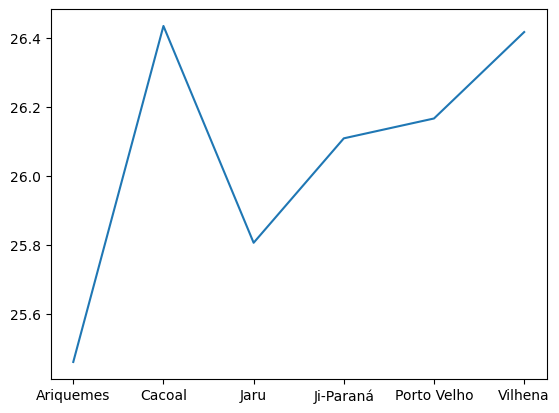

In [215]:
imediatas={'Candeias do Jamari':'Porto Velho',
'Guajará-Mirim':'Porto Velho',
'Itapuã do Oeste':'Porto Velho',
'Nova Mamoré':'Porto Velho',
'Porto Velho':'Porto Velho',
'Alto Paraíso':'Ariquemes',
'Ariquemes':'Ariquemes',
'Buritis':'Ariquemes',
'Cacaulândia':'Ariquemes',
'Campo Novo de Rondônia':'Ariquemes',
'Cujubim':'Ariquemes',
'Monte Negro':'Ariquemes',
'Rio Crespo':'Ariquemes',
'Governador Jorge Teixeira':'Jaru',
'Jaru':'Jaru',
"Machadinho d'Oeste":'Jaru',
'Theobroma':'Jaru',
'Vale do Anari':'Jaru',
"Alvorada d'Oeste":"Ji-Paraná",
'Costa Marques':"Ji-Paraná",
'Ji-Paraná':"Ji-Paraná",
'Mirante da Serra':"Ji-Paraná",
'Nova União':"Ji-Paraná",
'Ouro Preto do Oeste':"Ji-Paraná",
'Presidente Médici':"Ji-Paraná",
'São Francisco do Guaporé':"Ji-Paraná",
'São Miguel do Guaporé':"Ji-Paraná",
'Seringueiras':"Ji-Paraná",
'Teixeirópolis':"Ji-Paraná",
'Urupá':"Ji-Paraná",
'Vale do Paraíso':"Ji-Paraná",
"Alta Floresta d'Oeste":'Cacoal',
'Alto Alegre dos Parecis':'Cacoal',
'Cacoal':'Cacoal',
'Castanheiras':'Cacoal',
"Espigão d'Oeste":'Cacoal',
'Ministro Andreazza':'Cacoal',
"Nova Brasilândia d'Oeste":'Cacoal',
'Novo Horizonte do Oeste':'Cacoal',
'Parecis':'Cacoal',
'Pimenta Bueno':'Cacoal',
'Primavera de Rondônia':'Cacoal',
'Rolim de Moura':'Cacoal',
"Santa Luzia d'Oeste":'Cacoal',
"São Felipe d'Oeste":'Cacoal',
'Cabixi':'Vilhena',
'Cerejeiras':'Vilhena',
'Chupinguaia':'Vilhena',
'Colorado do Oeste':'Vilhena',
'Corumbiara':'Vilhena',
'Pimenteiras do Oeste':'Vilhena',
'Vilhena':'Vilhena'}
r_imediatas=sinasc_raw.set_index('munResNome')
plt.plot(r_imediatas.groupby(imediatas)['IDADEMAE'].mean())
print(r_imediatas.groupby(imediatas)['IDADEMAE'].mean().to_frame())
r_imediatas.groupby(imediatas)['DTNASC'].count().to_frame()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [213]:
mapping={'Porto Velho':'IDH alto',
'Vilhena':'IDH alto',
'Cacoal':'IDH alto',
'Ji-Paraná':'IDH alto',
'Pimenta Bueno':'IDH alto',
'Ariquemes':'IDH alto',
'Rolim de Moura':'IDH alto',
'Cerejeiras':'IDH médio',
'Jaru':'IDH médio',
'Colorado do Oeste':'IDH médio',
'Ouro Preto do Oeste':'IDH médio',
"Espigão d'Oeste":'IDH médio',
"Santa Luzia d'Oeste":'IDH médio',
'Pimenteiras do Oeste':'IDH médio',
'Presidente Médici':'IDH médio',
'Castanheiras':'IDH médio',
'Guajará-Mirim':'IDH médio',
'Chupinguaia':'IDH médio',
'Cabixi':'IDH médio',
'Candeias do Jamari':'IDH médio',
"São Felipe d'Oeste":'IDH médio',
'Cacaulândia':'IDH médio',
'São Miguel do Guaporé':'IDH médio',
'Mirante da Serra':'IDH médio',
"Alvorada d'Oeste":'IDH médio',
'Teixeirópolis':'IDH médio',
"Nova Brasilândia d'Oeste":'IDH médio',
"Rio Crespo":'IDH médio',
'Primavera de Rondônia':'IDH médio',
"Alta Floresta d'Oeste":'IDH médio',
'Ministro Andreazza':'IDH médio',
'Novo Horizonte do Oeste':'IDH médio',
'Vale do Paraíso':'IDH médio',
'Alto Paraíso':'IDH médio',
'Parecis':'IDH médio',
'Buritis':'IDH médio',
'Itapuã do Oeste':'IDH médio',
'Corumbiara':'IDH médio',
'Cujubim':'IDH médio',
'Costa Marques':'IDH médio',
'São Francisco do Guaporé':'IDH médio',
'Urupá':'IDH médio',
'Monte Negro':'IDH médio',
'Seringueiras':'IDH baixo',
'Governador Jorge Teixeira':'IDH baixo',
"Machadinho d'Oeste":'IDH baixo',
'Campo Novo de Rondônia':'IDH baixo',
'Alto Alegre dos Parecis':'IDH baixo',
'Theobroma':'IDH baixo',
'Nova União':'IDH baixo',
'Nova Mamoré':'IDH baixo',
'Vale do Anari':'IDH baixo'
}
idh_mun=sinasc_raw.set_index('munResNome')
print(idh_mun.groupby(mapping)['ESCMAE'].value_counts().to_frame())
idh_mun.groupby(mapping)['PARTO'].value_counts().to_frame()

                            ESCMAE
munResNome ESCMAE                 
IDH alto   8 a 11 anos        9395
           12 anos ou mais    4119
           4 a 7 anos         2809
           1 a 3 anos          286
           Nenhuma              23
IDH baixo  8 a 11 anos         868
           4 a 7 anos          280
           12 anos ou mais     135
           1 a 3 anos           27
           Nenhuma               3
IDH médio  8 a 11 anos        4268
           4 a 7 anos         1256
           12 anos ou mais    1169
           1 a 3 anos          149
           Nenhuma              11


PARTO
munResNome PARTO         
IDH alto   Cesáreo  10938
           Vaginal   5886
IDH baixo  Cesáreo    920
           Vaginal    403
IDH médio  Cesáreo   4694
           Vaginal   2203

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [192]:
mapping={'Ariquemes':' moderado',
'Vilhena':' moderado',
'Pimenta Bueno':' moderado',
'Porto Velho':' moderado',
'Ji-Paraná':' moderado',
'Cacoal':' moderado',
"Santa Luzia d'Oeste":' moderado',
'Rolim de Moura':' moderado',
'Chupinguaia':' moderado',
'São Miguel do Guaporé':' moderado',
'Pimenteiras do Oeste':' moderado',
'Teixeirópolis':' moderado',
'Colorado do Oeste':' moderado',
'Jaru':' moderado',
'Rio Crespo':' moderado',
'Primavera de Rondônia':' moderado',
"Alta Floresta d'Oeste":' moderado',
'Ouro Preto do Oeste':' moderado',
'São Francisco do Guaporé':' moderado',
'Candeias do Jamari':' moderado',
'Buritis':' moderado',
"São Felipe d'Oeste":' moderado',
'Presidente Médici':' moderado',
'Cerejeiras':' moderado',
'Monte Negro':' moderado',
'Urupá':' moderado',
"Espigão d'Oeste":' regular',
'Seringueiras':' regular',
"Alvorada d'Oeste":' regular',
'Itapuã do Oeste':' regular',
'Cabixi':' regular',
'Novo Horizonte do Oeste':' regular',
"Nova Brasilândia d'Oeste":' regular',
'Vale do Paraíso':' regular',
'Corumbiara':' regular',
'Alto Paraíso':' regular',
'Cacaulândia':' regular',
'Vale do Anari':' regular',
'Ministro Andreazza':' regular',
'Costa Marques':' regular',
'Nova União':' regular',
'Guajará-Mirim':' regular',
'Mirante da Serra':' regular',
'Parecis':' regular',
'Castanheiras':' regular',
'Theobroma':' regular',
"Machadinho d'Oeste":' regular',
'Campo Novo de Rondônia':' regular',
'Nova Mamoré':' regular',
'Cujubim':' regular',
'Alto Alegre dos Parecis':' regular',
'Governador Jorge Teixeira':' regular'
}
ifdm_mun=sinasc_raw.set_index('munResNome')['RACACOR']
ifdm_mun.groupby(mapping).value_counts().to_frame()

RACACOR
munResNome RACACOR          
 moderado  Parda       15727
           Branca       4275
           Preta         686
           Indígena      154
           Amarela        96
 regular   Parda        2641
           Branca        616
           Indígena      207
           Preta         114
           Amarela        13

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [208]:
mapping={'Porto Velho':'acima 1 bilhão',
'Ji-Paraná':'acima 1 bilhão',
'Vilhena':'acima 1 bilhão',
'Ariquemes':'acima 1 bilhão',
'Cacoal':'acima 1 bilhão',
'Jaru':'acima 1 bilhão',
'Rolim de Moura':'acima 1 bilhão',
'Pimenta Bueno':'acima 1 bilhão',
'Guajará-Mirim':'acima 500 milhões',
'Ouro Preto do Oeste':'acima 500 milhões',
'Buritis':'acima 500 milhões',
'Machadinho do Oeste':'acima 500 milhões',
"Espigão d'Oeste":'acima 500 milhões',
'São Miguel do Guaporé':'acima 500 milhões',
'Candeias do Jamari':'acima 500 milhões',
'Nova Mamoré':'acima 500 milhões',
'Cerejeiras':'acima 500 milhões',
'Alta Floresta do Oeste':'acima 300 milhões',
'Presidente Médici':'acima 300 milhões',
'Cujubim':'acima 300 milhões',
'Nova Brasilândia do Oeste':'acima 300 milhões',
'Alto Paraíso':'acima 300 milhões',
'São Francisco do Guaporé':'acima 300 milhões',
'Colorado do Oeste':'acima 300 milhões',
'Monte Negro':'acima 200 milhões',
'Alto Alegre dos Parecis':'acima 200 milhões',
'Campo Novo de Rondônia':'acima 200 milhões',
'Alvorada do Oeste':'acima 200 milhões',
'Chupinguaia':'acima 100 milhões',
'Corumbiara':'acima 100 milhões',
'Ministro Andreazza':'acima 100 milhões',
'Urupá':'acima 100 milhões',
'Costa Marques':'acima 100 milhões',
'Seringueiras':'acima 100 milhões',
'Mirante da Serra':'acima 100 milhões',
'Governador Jorge Teixeira':'acima 100 milhões',
'Theobroma':'acima 100 milhões',
'Santa Luzia do Oeste':'acima 100 milhões',
'Novo Horizonte do Oeste':'acima 100 milhões',
'Itapuã do Oeste':'acima 100 milhões',
'Vale do Paraíso':'acima 100 milhões',
'Cacaulândia':'acima 100 milhões',
'Cabixi':'acima 100 milhões',
'Vale do Anari':'acima 100 milhões',
'Nova União':'até 100 milhões',
'Parecis':'até 100 milhões',
'Rio Crespo':'até 100 milhões',
'Pimenteiras do Oeste':'até 100 milhões',
'Teixeirópolis':'até 100 milhões',
'São Felipe do Oeste':'até 100 milhões',
'Castanheiras':'até 100 milhões',
'Primavera de Rondônia':'até 100 milhões'
}
pib_mun=sinasc_raw.set_index('munResNome')['SEXO']
pib_mun.groupby(mapping).value_counts().to_frame()


SEXO
munResNome        SEXO           
acima 1 bilhão    Masculino  9079
                  Feminino   8654
acima 100 milhões Masculino   945
                  Feminino    908
acima 200 milhões Masculino   291
                  Feminino    228
acima 300 milhões Masculino   641
                  Feminino    610
acima 500 milhões Masculino  1717
                  Feminino   1637
até 100 milhões   Masculino   200
                  Feminino    177

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Nas regiões imediata de Rondônia temos maior números de nascimento na região de Porto Velho e menor nascimento na região de Jaru, quanto a idade média das mães permanecem praticamente iguais entre 25,4 e 26,4 anos. 

Nas regiões de IDH mais alto, as mães tem mais tempo de escolaridade e onde tem o maior número de nascimento, e em todas as regiões o número de parto cesáreo são praticamente o dobro dos partos vaginais.

Verifiquei que a maioria das raças Parda, Branca, Preta e Amarela vivem em regiões de IFDM moderado, enquanto a maioria da raça indígena vive em região de IFDM regular.

Dividindo os municípios por faixa de PIB verifiquei que em todas as faixas o numéro de nascimento de crianças do sexo masculino são maiores.